Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**We use the Starter notebook given and build on top of it our model**

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomTranslation, RandomCrop, RandomContrast

In [31]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
#drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [33]:
!ls /content/gdrive/MyDrive/MelanomaAssignment/

 CNN_assignment.zip  'Skin cancer ISIC The International Skin Imaging Collaboration'
 nonImputedData       Starter_code_Assignment_CNN_Skin_Cancer.ipynb


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [25]:
#!unzip /content/gdrive/MyDrive/MelanomaAssignment/CNN_assignment.zip -d /content/gdrive/MyDrive/MelanomaAssignemt/

Archive:  /content/gdrive/MyDrive/MelanomaAssignment/CNN_assignment.zip
  inflating: /content/gdrive/MyDrive/MelanomaAssignemt/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/gdrive/MyDrive/MelanomaAssignemt/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/gdrive/MyDrive/MelanomaAssignemt/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/gdrive/MyDrive/MelanomaAssignemt/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/gdrive/MyDrive/MelanomaAssignemt/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/gdrive/MyDrive/MelanomaAssignemt/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic ker

In [34]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset

path_to_train_directory = "/content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
path_to_test_directory = "/content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test"
data_dir_train = pathlib.Path(path_to_train_directory)
data_dir_test = pathlib.Path(path_to_test_directory)

In [35]:
print(data_dir_train)
print(data_dir_test)

/content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train
/content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test


In [36]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180
num_input_channels = 3
num_classes = 9

Use 80% of the images for training, and 20% for validation.

In [40]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = image_dataset_from_directory(data_dir_train,
                                        seed = 123,
                                        validation_split = 0.2,
                                        subset = "training",
                                        image_size = (img_height, img_width),
                                        batch_size = batch_size
                                        )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [41]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = image_dataset_from_directory(data_dir_train,
                                      seed = 123,
                                      validation_split = 0.2,
                                      subset = "validation",
                                      image_size = (img_height, img_width),
                                      batch_size = batch_size
                                      )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [42]:
for image_batch, label_batch in train_ds:
  print(image_batch.shape)
  print(label_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [44]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

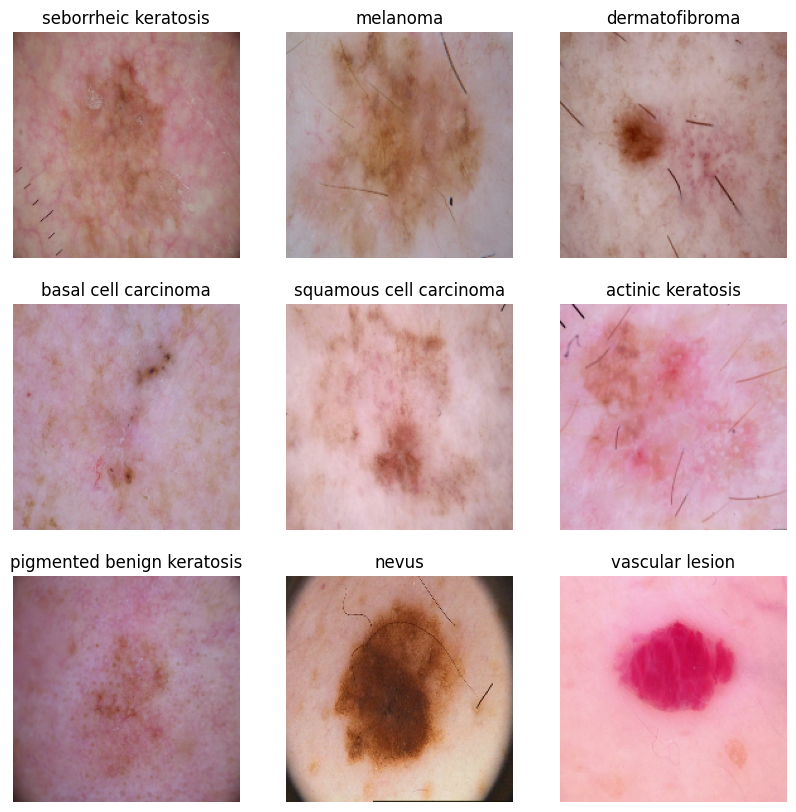

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize = (10,10))
classes = class_names.copy()

count = 0
for image,labels in train_ds.take(2):

    for i in range(0,32):
      c = class_names[labels[i]]
      if c in classes:
        ax = plt.subplot(3,3,count+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        classes.pop(classes.index(c))
        plt.axis("off")
        count += 1

      if (0==len(classes)):
        break


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
# to scale pixels in range [0, 255]
scale = 1./255

model_description_1 = [
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Dropout(0.5),

    Flatten(),
    Dense(128, activation = "relu"),
    Dense(num_classes)
    ]

In [80]:
model_description_2 = [
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),


    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),


    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation = "relu"),
    Dense(num_classes)
    ]

In [85]:
model_description_3 = [
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation = "relu"),

    Dense(num_classes)
    ]

In [73]:
model_description_4 = [
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(256, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),

    Dense(512, activation = "relu"),
    Dropout(0.5),

    Dense(num_classes)
    ]

In [86]:
model = Sequential(model_description_3)

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [87]:
### Todo, choose an appropirate optimiser and loss function
## adam, rmsprop,sgd  are the optimizers experimented with adam gave more interpretable results

# Logits are the outputs of a neural network before the activation function is applied,
# in this case a softmax layer at the end of the Dense layer representing num_classes
# since we dont have corrosponding softmax layer at the end we expect logits input and inform the model compilation of the same
# with from_logit=True in loss function definition

# also since the output labes are not one-hot encoded, we use Categorical Cross entropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [88]:
# View the summary of all layers
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 45, 45, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 45, 45, 128)     

### Train the model

In [89]:
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 19s 259ms/step - loss: 2.0196 - accuracy: 0.2288 - val_loss: 1.8738 - val_accuracy: 0.3311
Epoch 2/20
56/56 [==============================] - 16s 262ms/step - loss: 1.7857 - accuracy: 0.3532 - val_loss: 1.8256 - val_accuracy: 0.3221
Epoch 3/20
56/56 [==============================] - 16s 263ms/step - loss: 1.6557 - accuracy: 0.4157 - val_loss: 1.9197 - val_accuracy: 0.3087
Epoch 4/20
56/56 [==============================] - 17s 255ms/step - loss: 1.5670 - accuracy: 0.4515 - val_loss: 1.5112 - val_accuracy: 0.4810
Epoch 5/20
56/56 [==============================] - 17s 257ms/step - loss: 1.4010 - accuracy: 0.5123 - val_loss: 1.4117 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 16s 261ms/step - loss: 1.3457 - accuracy: 0.5346 - val_loss: 1.3915 - val_accuracy: 0.5056
Epoch 7/20
56/56 [==============================] - 16s 263ms/step - loss: 1.2936 - accuracy: 0.5508 - val_loss: 1.3766 - val_accuracy: 0.5056

### Visualizing training results

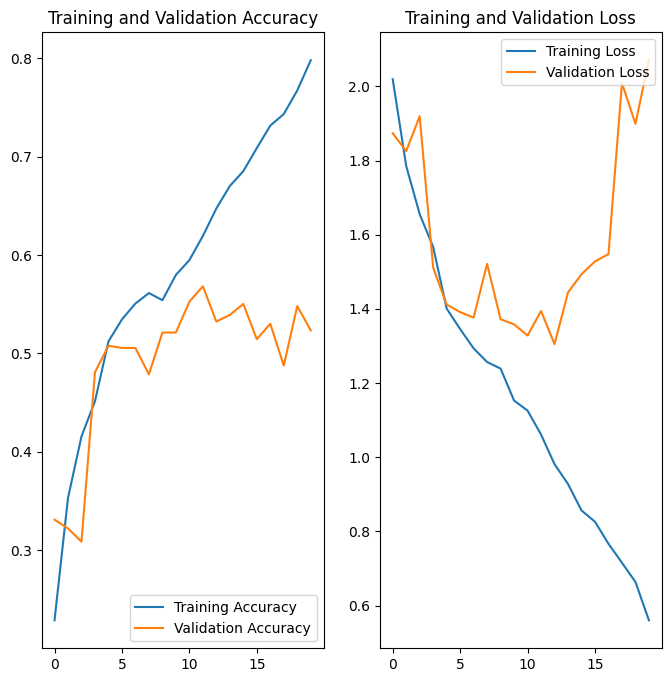

In [90]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

### ***The model clearly overfits this can be seen by comparing its performance on training and validation data***
### ***The model's performance on training dataset stands at 79% while on validation dataset it scores poorly at 52%***
### ***In addition the validation losses seem to show a increasing trend toward the end of epoc trainign***

In [59]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

augmentor_description = [
    RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    RandomContrast(0.4),
    RandomRotation(0.1),
    RandomZoom(0.1),
    RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    RandomCrop(img_height,img_width)
    ]

data_augmentation = keras.Sequential( augmentor_description)

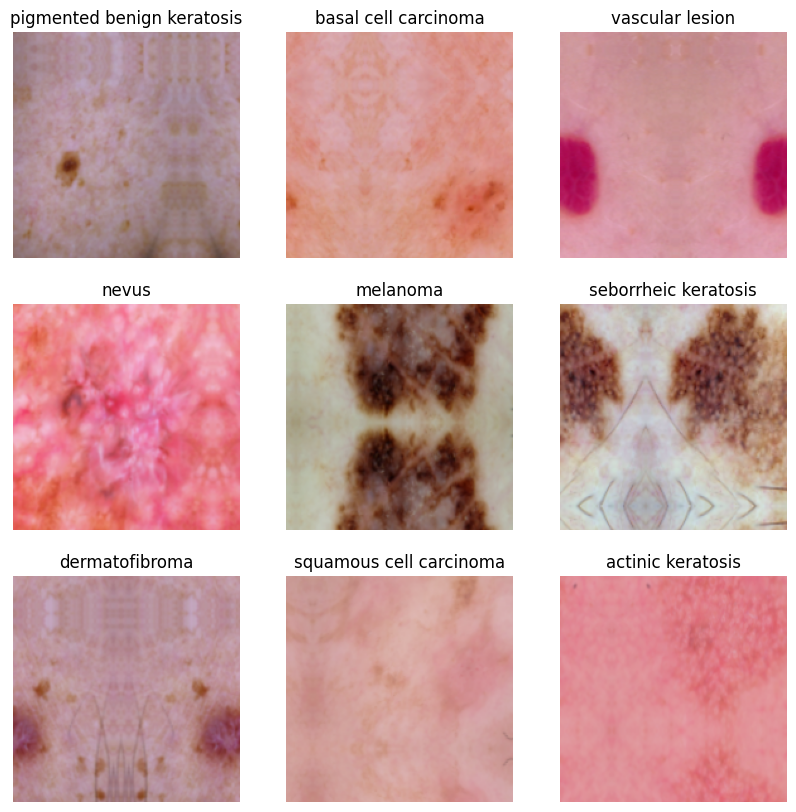

In [45]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
i = np.random.randint(0,32)
plt.figure(figsize = (10,10))
classes = class_names.copy()
#get a batch of image containing 32 images and send it through augmentor pipeline
count = 0
for images,labels in train_ds.take(2):
    augmented_image = data_augmentation(images)
    for i in range(0,32):
      c = class_names[labels[i]]
      if c in classes:
        ax = plt.subplot(3,3,count+1)
        plt.imshow(augmented_image[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        classes.pop(classes.index(c))
        plt.axis("off")
        count += 1

      if (0==len(classes)):
        break


### Todo:
### Create the model, compile and train the model


In [68]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model_description = [
    data_augmentation,

    Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(256, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),

    Dense(512, activation = "relu"),
    Dropout(0.5),
    Dense(num_classes)
    ]

model = Sequential(model_description)

### Compiling the model

In [69]:
## Your code goes here
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )


In [70]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 45, 45, 64)        0         
 ng2D)                                               

In [ ]:
## Your code goes here, note: train your model for 20 epochs
## your training code
history = model.fit(train_ds, validation_data = val_ds, epochs=20)

Epoch 1/20
56/56 [==============================] - 8s 89ms/step - loss: 2.4200 - accuracy: 0.2087 - val_loss: 2.0045 - val_accuracy: 0.2953
Epoch 2/20
56/56 [==============================] - 5s 81ms/step - loss: 1.8731 - accuracy: 0.2935 - val_loss: 1.7939 - val_accuracy: 0.2998
Epoch 3/20
56/56 [==============================] - 5s 84ms/step - loss: 1.7926 - accuracy: 0.3153 - val_loss: 1.6833 - val_accuracy: 0.3132
Epoch 4/20
56/56 [==============================] - 5s 82ms/step - loss: 1.7428 - accuracy: 0.3331 - val_loss: 1.6262 - val_accuracy: 0.3758
Epoch 5/20
56/56 [==============================] - 5s 81ms/step - loss: 1.6579 - accuracy: 0.3711 - val_loss: 1.7630 - val_accuracy: 0.3602
Epoch 6/20
56/56 [==============================] - 5s 85ms/step - loss: 1.6727 - accuracy: 0.3828 - val_loss: 1.6765 - val_accuracy: 0.3982
Epoch 7/20
56/56 [==============================] - 5s 81ms/step - loss: 1.5848 - accuracy: 0.4035 - val_loss: 1.5379 - val_accuracy: 0.4564
Epoch 8/20
56

### Visualizing the results

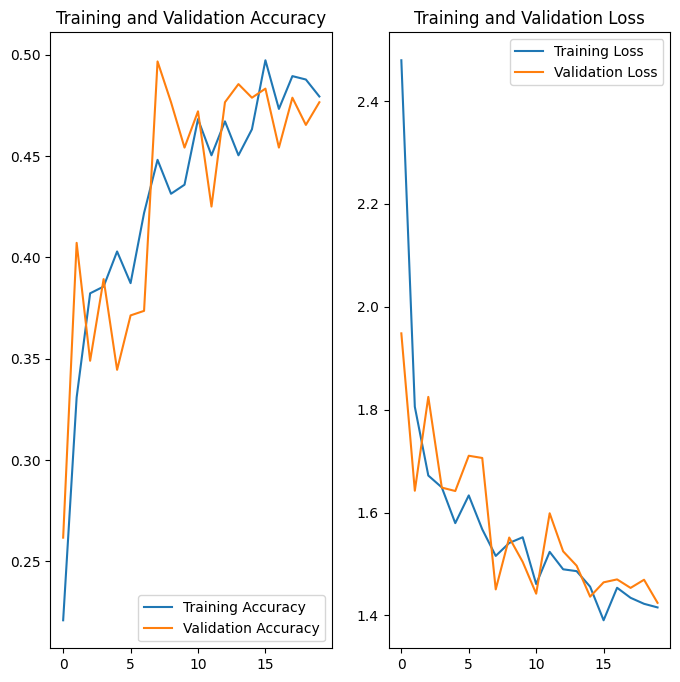

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

***Augmentation seems to have helped with the problem of overfitting we know see considerable performance on train and validation accuracies, however the training process output seems to indicate the model is not able to capture generic patterns in datset which is resulting in lower model accuracy on a whole***

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [91]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
print(original_df["Path"][12])
print(original_df["Label"][12])
original_df.head(5)

/content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026468.jpg
actinic keratosis


,Path,Label
0,/content/gdrive/MyDrive/MelanomaAssignment/Ski...,actinic keratosis
1,/content/gdrive/MyDrive/MelanomaAssignment/Ski...,actinic keratosis
2,/content/gdrive/MyDrive/MelanomaAssignment/Ski...,actinic keratosis
3,/content/gdrive/MyDrive/MelanomaAssignment/Ski...,actinic keratosis
4,/content/gdrive/MyDrive/MelanomaAssignment/Ski...,actinic keratosis


In [92]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*'))]
lesion_list = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
class_names = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
class_count_map = dict()
class_name_count_map = dict()
for path in path_list:
  key = (os.path.basename(path))
  count = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))])
  class_count_map.update({key:count})
  class_name_count_map.update({class_names.index(key):count})

In [93]:
class_count_map

{'actinic keratosis': 114,
 'basal cell carcinoma': 376,
 'dermatofibroma': 95,
 'melanoma': 438,
 'nevus': 357,
 'pigmented benign keratosis': 462,
 'seborrheic keratosis': 77,
 'squamous cell carcinoma': 181,
 'vascular lesion': 139}

In [94]:
class_name_count_map

{0: 114, 1: 376, 2: 95, 3: 438, 4: 357, 5: 462, 6: 77, 7: 181, 8: 139}

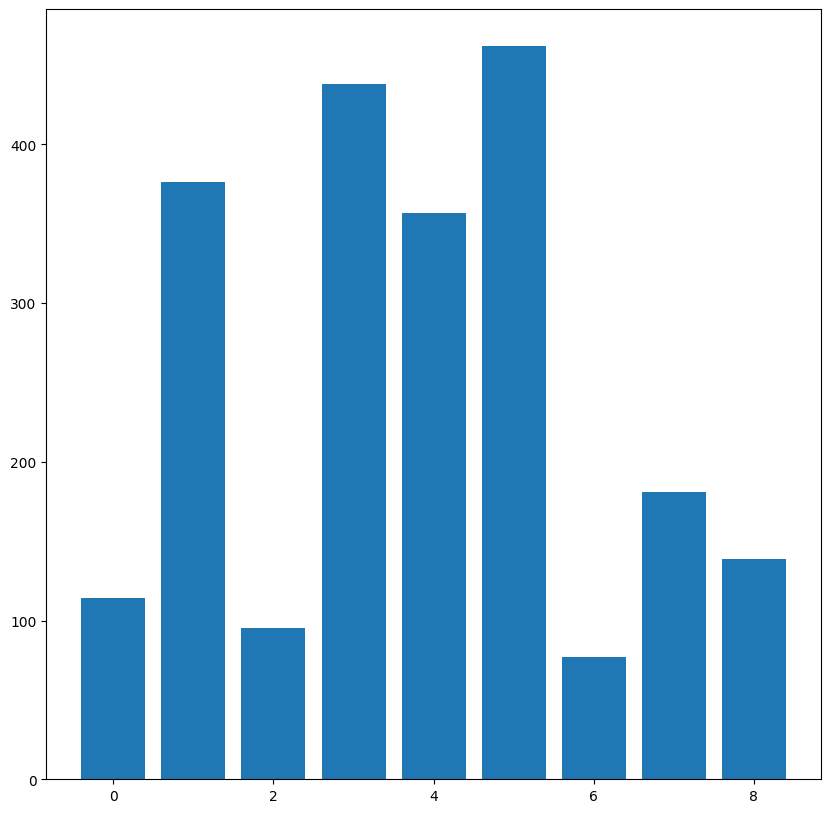

In [95]:
plt.figure(figsize = (10,10))
plt.bar(class_name_count_map.keys(), class_name_count_map.values())
plt.show()

#### **Todo:** Write your findings here:

#### - Which class has the least number of samples?
&nbsp;&nbsp;&nbsp; - actinic keratosis (0), dermatofibroma (2), seborrheic keratosis(6), squamous cell carcinoma(7), vascular lesion (8) have least number of samples


#### - Which classes dominate the data in terms proportionate number of samples?
&nbsp;&nbsp;&nbsp; - basal cell carcinoma (1), melanoma (3), nevus (4), pigmented benign keratosis (5) dominates the proportion in terms of number of samples

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [98]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [96]:
data_dir_train

PosixPath('/content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [99]:
path_to_training_dataset = r'/content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x791EEDDAB400>: 100%|██████████| 500/500 [00:23<00:00, 21.61 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x791EEDE17790>: 100%|██████████| 500/500 [00:21<00:00, 22.82 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x791EEDE6B730>: 100%|██████████| 500/500 [00:18<00:00, 27.46 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x791EEDF5CF10>: 100%|██████████| 500/500 [01:25<00:00,  5.85 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x791EEE41DCF0>: 100%|██████████| 500/500 [01:14<00:00,  6.67 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x791EEDD6DC30>: 100%|██████████| 500/500 [00:19<00:00, 25.15 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x791EF1C104C0>: 100%|██████████| 500/500 [00:39<00:00, 12.60 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x791EEDC51C00>: 100%|██████████| 500/500 [00:18<00:00, 26.94 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x791EEDD2CDF0>: 100%|██████████| 500/500 [00:18<00:00, 26.82 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [100]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print("Newly augmented dataset image count = {}".format(image_count_train))

Newly augmented dataset image count = 4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [101]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031108.jpg_6cd9cc03-ef5f-4946-8c8e-d76a2ca1b8d5.jpg',
 '/content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028517.jpg_61a68b6f-8aec-4b20-a1ff-5553bd5cd375.jpg',
 '/content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027172.jpg_ae272dca-6650-4f00-bc85-c3b398050a92.jpg',
 '/content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025992.jpg_02011ac0-f281-4607-bad3-2237d9bdfce5.jpg',
 '/content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collabo

In [102]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [103]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [104]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-104-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [105]:
new_df.head(5)

,Path,Label
0,/content/gdrive/MyDrive/MelanomaAssignment/Ski...,actinic keratosis
1,/content/gdrive/MyDrive/MelanomaAssignment/Ski...,actinic keratosis
2,/content/gdrive/MyDrive/MelanomaAssignment/Ski...,actinic keratosis
3,/content/gdrive/MyDrive/MelanomaAssignment/Ski...,actinic keratosis
4,/content/gdrive/MyDrive/MelanomaAssignment/Ski...,actinic keratosis


In [106]:
new_df.tail(5)

,Path,Label
4495,/content/gdrive/MyDrive/MelanomaAssignment/Ski...,vascular lesion
4496,/content/gdrive/MyDrive/MelanomaAssignment/Ski...,vascular lesion
4497,/content/gdrive/MyDrive/MelanomaAssignment/Ski...,vascular lesion
4498,/content/gdrive/MyDrive/MelanomaAssignment/Ski...,vascular lesion
4499,/content/gdrive/MyDrive/MelanomaAssignment/Ski...,vascular lesion


In [107]:
new_df['Label'].value_counts()
print("New Dataset count {}".format(new_df['Label'].shape[0]))

New Dataset count 6739


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [108]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [109]:
#data_dir_train="path to directory with training data + data created using augmentor"
path_to_train_directory = "/content/gdrive/MyDrive/MelanomaAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
data_dir_train = pathlib.Path(path_to_train_directory)


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size = (img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [110]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [111]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Todo:** Create your model (make sure to include normalization)

In [112]:
## your code goes here



model_description = [
    #data_augmentation,

    Rescaling(1./255, input_shape = (img_height, img_width, 3)),

    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(256, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),

    Dense(512, activation = "relu"),
    Dropout(0.3),
    Dense(num_classes)
    ]


model = Sequential(model_description)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [113]:
## your code goes here
model.compile(optimizer="adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"]
              )
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_12 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 45, 45, 64)      

#### **Todo:**  Train your model

In [114]:
## Your code goes here, use 50 epochs.
epochs = 50
# your model fit code
history = model.fit(train_ds, validation_data = val_ds, epochs=epochs)

Epoch 1/50
169/169 [==============================] - 40s 62ms/step - loss: 2.0830 - accuracy: 0.1903 - val_loss: 1.7901 - val_accuracy: 0.2947
Epoch 2/50
169/169 [==============================] - 4s 25ms/step - loss: 1.7217 - accuracy: 0.3375 - val_loss: 1.5581 - val_accuracy: 0.4068
Epoch 3/50
169/169 [==============================] - 4s 23ms/step - loss: 1.5099 - accuracy: 0.4264 - val_loss: 1.3859 - val_accuracy: 0.4818
Epoch 4/50
169/169 [==============================] - 4s 22ms/step - loss: 1.3197 - accuracy: 0.5006 - val_loss: 1.1936 - val_accuracy: 0.5783
Epoch 5/50
169/169 [==============================] - 4s 25ms/step - loss: 1.1885 - accuracy: 0.5560 - val_loss: 1.0906 - val_accuracy: 0.5947
Epoch 6/50
169/169 [==============================] - 4s 22ms/step - loss: 0.9749 - accuracy: 0.6406 - val_loss: 0.9844 - val_accuracy: 0.6466
Epoch 7/50
169/169 [==============================] - 4s 24ms/step - loss: 0.8519 - accuracy: 0.6771 - val_loss: 0.7975 - val_accuracy: 0.689

#### **Todo:**  Visualize the model results

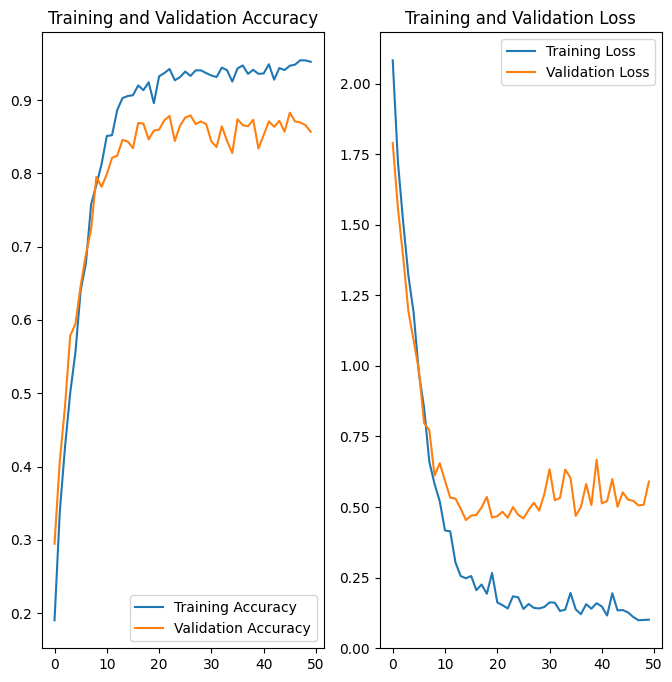

In [115]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



***The class rebalance helped in acheiving a better model in terms of elminiating the overfitting/underfitting issue and in addition validation loss plateus and oscillates between 0.5 to 0.7 post epoch 20.***

***The initial few epocs bring the validation loss down from 1.75 to around 0.5 which is significant***